In [191]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import random
import cv2
import pickle

In [192]:
images = []
number_of_errors = 0
number_of_processed = 0


dir = "S:\Downloads\data sets\eardrumDs\eardrumDs"

for class_name in os.listdir(dir):
    path_to_class = dir + "/" + class_name
    for image in os.listdir(path_to_class):
        
        
        try:
            path_to_image = f"{path_to_class}/{image}"

            img = cv2.imread(path_to_image, 0)
            img = cv2.resize(img, (128,128))
            img = img/255
            images.append([img, int(class_name)])
            number_of_processed += 1
        except:
            number_of_errors += 1
        print(f"\rProcessed: {number_of_processed} | Erros: {number_of_errors}", end="")

Processed: 955 | Erros: 0

In [193]:
len(images)

955

In [194]:
for _ in range(27):
    random.shuffle(images)

In [195]:
X = []
y = []

for image, idx in images:
    X.append(image)
    y.append(idx)

In [196]:
print(len(X))
print(len(y))

955
955


In [197]:
X_train = []
y_train = []

X_val = []
y_val = []

X_test = []
y_test = []

In [198]:
X_train = X[:600]
y_train = y[:600]

X_val = X[600:777]
y_val = y[600:777]

X_test = X[777:]
y_test = y[777:]

In [199]:
print(len(X_train))
print(len(y_train))
print(len(X_val))
print(len(y_val))
print(len(X_test))
print(len(y_test))

600
600
177
177
178
178


In [200]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_val = np.array(X_val)
y_val = np.array(y_val)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [201]:
X_train = X_train.reshape(-1, 128, 128, 1) 
X_val = X_val.reshape(-1, 128, 128, 1) 
X_test = X_test.reshape(-1, 128, 128, 1) 

In [202]:
if "pickles" not in os.listdir():
    os.mkdir("pickles")

with open("pickles/X_train.pickle", "wb") as f:
  pickle.dump(X_train, f)  
with open("pickles/y_train.pickle", "wb") as f:
  pickle.dump(y_train, f)

with open("pickles/X_val.pickle", "wb") as f:
  pickle.dump(X_val, f)  
with open("pickles/y_val.pickle", "wb") as f:
  pickle.dump(y_val, f)

with open("pickles/X_test.pickle", "wb") as f:
  pickle.dump(X_test, f)  
with open("pickles/y_test.pickle", "wb") as f:
  pickle.dump(y_test, f)
  

In [203]:
# Model
model = tf.keras.Sequential()

# Feature Extraction
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), strides=(2,2), padding="same", input_shape=(128, 128, 1)))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(tf.keras.layers.Conv2D(128, kernel_size=(3,3), strides=(2,2), padding="same", activation="relu"))
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Flatten
model.add(tf.keras.layers.Flatten())

# Classification
model.add(tf.keras.layers.Dense(64, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(256, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(512, activation="relu"))
model.add(tf.keras.layers.Dropout(0.5))

# Output Layer
model.add(tf.keras.layers.Dense(9, activation="softmax"))

In [204]:
model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

In [205]:
history = model.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
19/19 [==============================] - 2s 55ms/step - loss: 1.6979 - accuracy: 0.5133 - val_loss: 1.6126 - val_accuracy: 0.5424
Epoch 2/50
19/19 [==============================] - 1s 51ms/step - loss: 1.4944 - accuracy: 0.5483 - val_loss: 1.6968 - val_accuracy: 0.5424
Epoch 3/50
19/19 [==============================] - 1s 42ms/step - loss: 1.5251 - accuracy: 0.5517 - val_loss: 1.5871 - val_accuracy: 0.5424
Epoch 4/50
19/19 [==============================] - 1s 43ms/step - loss: 1.4756 - accuracy: 0.5517 - val_loss: 1.5254 - val_accuracy: 0.5424
Epoch 5/50
19/19 [==============================] - 1s 46ms/step - loss: 1.4913 - accuracy: 0.5517 - val_loss: 1.5215 - val_accuracy: 0.5424
Epoch 6/50
19/19 [==============================] - 1s 39ms/step - loss: 1.4814 - accuracy: 0.5517 - val_loss: 1.5742 - val_accuracy: 0.5424
Epoch 7/50
19/19 [==============================] - 1s 39ms/step - loss: 1.5080 - accuracy: 0.5517 - val_loss: 1.5288 - val_accuracy: 0.5424
Epoch 8/50
19

In [206]:
result = model.evaluate(X_test, y_test)
print(f"Loss: {result[0]} - Accuracy: {result[1]}")

6/6 [==============================] - 0s 12ms/step - loss: 1.4990 - accuracy: 0.4551
Loss: 1.4990124702453613 - Accuracy: 0.45505619049072266


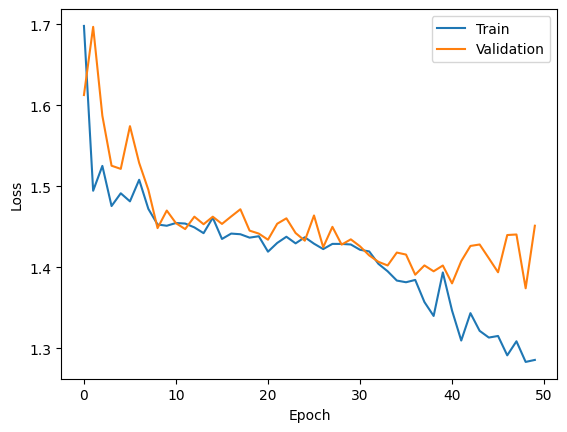

In [207]:
plt.plot(history.history["loss"], label="Train")
plt.plot(history.history["val_loss"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Loss")

plt.legend()
plt.show()

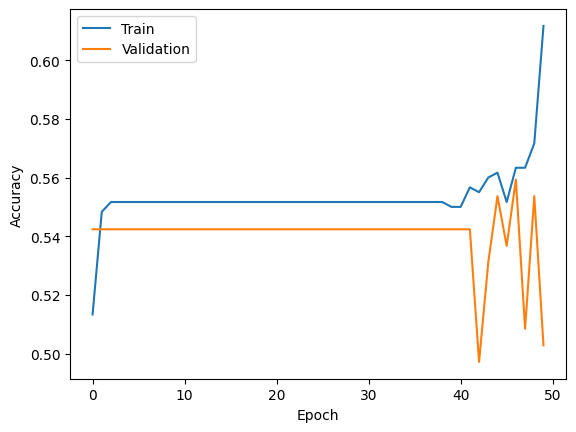

In [208]:
plt.plot(history.history["accuracy"], label="Train")
plt.plot(history.history["val_accuracy"], label="Validation")

plt.xlabel("Epoch")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [209]:
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 10ms/step - loss: 1.4990 - accuracy: 0.4551


[1.4990124702453613, 0.45505619049072266]

In [210]:
# Make prediction on the reshaped sample
prediction_result = model.predict(X_test[20].reshape(-1,128,128,1))

# Print the prediction result
prediction_result

1/1 [==============================] - 0s 76ms/step


array([[0.08270236, 0.08085436, 0.02676444, 0.11905265, 0.00248282,
        0.5775418 , 0.0314183 , 0.02358931, 0.05559392]], dtype=float32)

In [211]:
# Find the predicted class
predicted_class = prediction_result.argmax()
# Find the prediction probability
predicted_probability = prediction_result.max()

In [212]:
# Print the results
print(f"This image belongs to class {predicted_class} with {predicted_probability} probability %")

This image belongs to class 5 with 0.5775418281555176 probability %
